In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
import os
os.getcwd()

'C:\\Users\\Xpert\\Downloads'

In [86]:
os.chdir('/Users/Xpert/Downloads')

In [87]:
os.getcwd()

'C:\\Users\\Xpert\\Downloads'

In [88]:
data=pd.read_csv('Ecommerce_data.csv', encoding='latin1')
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [91]:
data.shape

(541909, 8)

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## 2. Missing value treatment

In [37]:
data.isnull().sum()/len(data)

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

- If a column has more than 50% missing values then frop that particular column
- If a column has less than 50% missing values then will do missing value treatment

#### Missing value treatment:
- Mean
- Median
- Mode
- Build a model to missing value treatment

In [38]:
data.Description.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
ASSORTED COLOUR BIRD ORNAMENT          1501
SET OF 3 CAKE TINS PANTRY DESIGN       1473
PACK OF 72 RETROSPOT CAKE CASES        1385
LUNCH BAG  BLACK SKULL.                1350
NATURAL SLATE HEART CHALKBOARD         1280
POSTAGE                                1252
JUMBO BAG PINK POLKADOT                1251
HEART OF WICKER SMALL                  1237
JAM MAKING SET WITH JARS               1229
JUMBO STORAGE BAG SUKI                 1214
PAPER CHAIN KIT 50'S CHRISTMAS         1210
JUMBO SHOPPER VINTAGE RED PAISLEY      1202
LUNCH BAG CARS BLUE                    1197
LUNCH BAG SPACEBOY DESIGN              1192
JAM MAKING SET PRINTED                 1182
RECIPE BOX PANTRY YELLOW DESIGN        1180
SPOTTY BUNTING                         1172
LUNCH BAG SUKI DESIGN           

In [40]:
data['Description'].fillna('WHITE HANGING HEART T-LIGHT HOLDER',inplace=True)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    541909 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## 3. Remove duplicate rows

In [92]:
data=data.drop_duplicates()
data.shape

(536641, 8)

So, we have 5268 duplicate rows.

## 4. Remove rows which have negative values in Quantity column

In [44]:
data_filtered=data[data['Quantity']>=0]

In [45]:
data_filtered.shape

(526054, 8)

## 5. Add the columns- Month,Day and Hour for the invoice

In [93]:
data_filtered['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])
data_filtered['InvoiceDate']

C:\Users\XperT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
5        2010-12-01 08:26:00
6        2010-12-01 08:26:00
7        2010-12-01 08:28:00
8        2010-12-01 08:28:00
9        2010-12-01 08:34:00
10       2010-12-01 08:34:00
11       2010-12-01 08:34:00
12       2010-12-01 08:34:00
13       2010-12-01 08:34:00
14       2010-12-01 08:34:00
15       2010-12-01 08:34:00
16       2010-12-01 08:34:00
17       2010-12-01 08:34:00
18       2010-12-01 08:34:00
19       2010-12-01 08:34:00
20       2010-12-01 08:34:00
21       2010-12-01 08:34:00
22       2010-12-01 08:34:00
23       2010-12-01 08:34:00
24       2010-12-01 08:34:00
25       2010-12-01 08:35:00
26       2010-12-01 08:45:00
27       2010-12-01 08:45:00
28       2010-12-01 08:45:00
29       2010-12-01 08:45:00
                 ...        
541879   2011-12-09 12:31:00
541880   2011-12-09 12:31:00
541881   2011-12-09 12:31:00
541882   2011-

In [95]:
data_filtered['Month']=data_filtered['InvoiceDate'].dt.month
data_filtered['Day']=data_filtered['InvoiceDate'].dt.day
data_filtered['Hour']=data_filtered['InvoiceDate'].dt.hour
data_filtered.head()

C:\Users\XperT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\XperT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\XperT\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Day,hour,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,1,8,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,1,8,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8,8


## 6. How many orders made by the customers?

In [96]:
data_pivot=data_filtered.pivot_table(index=["CustomerID"],values=['InvoiceNo'],aggfunc=pd.Series.nunique).reset_index()
data_pivot

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
5,12352.0,8
6,12353.0,1
7,12354.0,1
8,12355.0,1
9,12356.0,3


In [97]:
data_pivot["InvoiceNo"].sum()

18536

## 7. Top 5 customers with high number of orders

In [100]:
data_sort1=data_pivot.sort_values('InvoiceNo',ascending=False)
data_sort1.head()

,CustomerID,InvoiceNo
326,12748.0,210
1880,14911.0,201
4011,17841.0,124
562,13089.0,97
1662,14606.0,93


## 8. How much money spent by the customers?

In [99]:
data_filtered["TotalPrice"]=data_filtered["Quantity"]*data_filtered["UnitPrice"]
data_filtered.head()

C:\Users\XperT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Day,hour,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,1,8,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,1,8,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8,8


In [101]:
data_pivot=data_filtered.pivot_table(index=["CustomerID"],values=['TotalPrice'],aggfunc='sum').reset_index()
data_pivot['TotalPrice'].sum()

8887208.894

## 9. Top 5 customers with highest money spent

In [102]:
data_pivot=data_filtered.pivot_table(index=["CustomerID"],values=['TotalPrice'],aggfunc='sum').reset_index()
data_sort2=data_pivot.sort_values("TotalPrice",ascending=False)
data_sort2.head()

,CustomerID,TotalPrice
1690,14646.0,280206.02
4202,18102.0,259657.30
3729,17450.0,194390.79
3009,16446.0,168472.50
1880,14911.0,143711.17


## 10. How many orders per month?

In [76]:
data_pivot=data_filtered.pivot_table(index=["Month"],values=['InvoiceNo'],aggfunc=pd.Series.nunique).reset_index()
data_pivot

,Month,InvoiceNo
0,1,1120
1,2,1126
2,3,1531
3,4,1318
4,5,1731
5,6,1576
6,7,1540
7,8,1409
8,9,1896
9,10,2129


## 11. How many orders per day?

In [77]:
data_pivot=data_filtered.pivot_table(index=["Day"],values=['InvoiceNo'],aggfunc=pd.Series.nunique).reset_index()
data_pivot

,Day,InvoiceNo
0,1,780
1,2,686
2,3,577
3,4,708
4,5,795
5,6,882
6,7,851
7,8,887
8,9,732
9,10,723


## 12. How many orders per hour?

In [80]:
data_pivot=data_filtered.pivot_table(index=["hour"],values=['InvoiceNo'],aggfunc=pd.Series.nunique).reset_index()
data_pivot

,hour,InvoiceNo
0,6,1
1,7,29
2,8,568
3,9,1538
4,10,2431
5,11,2473
6,12,3323
7,13,2818
8,14,2557
9,15,2474


## 13. How many orders for each country?

In [81]:
data_pivot=data_filtered.pivot_table(index=["Country"],values=['InvoiceNo'],aggfunc=pd.Series.nunique).reset_index()
data_pivot

,Country,InvoiceNo
0,Australia,57
1,Austria,17
2,Bahrain,3
3,Belgium,98
4,Brazil,1
5,Canada,6
6,Channel Islands,26
7,Cyprus,16
8,Czech Republic,2
9,Denmark,18


## 15. How much money spent by each country?

In [82]:
data_pivot=data_filtered.pivot_table(index=["Country"],values=['TotalPrice'],aggfunc="sum").reset_index()
data_pivot

,Country,TotalPrice
0,Australia,1.384538e+05
1,Austria,1.019868e+04
2,Bahrain,7.541400e+02
3,Belgium,4.119634e+04
4,Brazil,1.143600e+03
5,Canada,3.666380e+03
6,Channel Islands,2.044054e+04
7,Cyprus,1.350285e+04
8,Czech Republic,8.267400e+02
9,Denmark,1.895534e+04


## Box plot

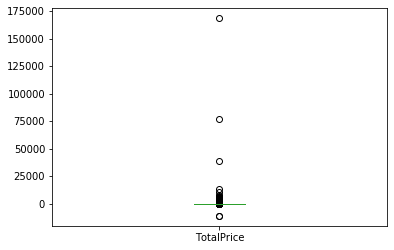

In [103]:
data_filtered.TotalPrice.plot.box()

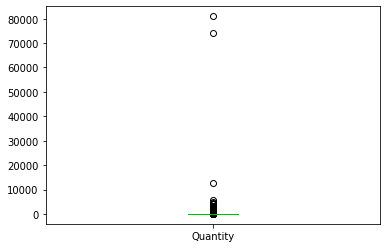

In [105]:
data_filtered.Quantity.plot.box()

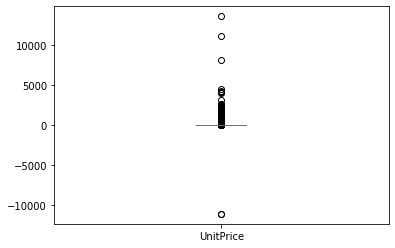

In [106]:
data_filtered.UnitPrice.plot.box()

## Histogram

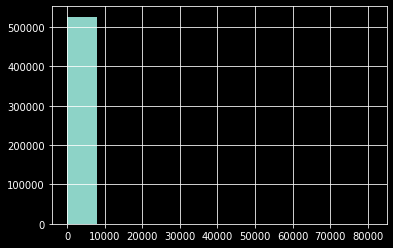

In [109]:
plt.style.use('dark_background')
data_filtered['Quantity'].hist()